In [19]:
import json
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

In [20]:
RESULTS_DIR = 'results/xdn'

In [21]:
data = defaultdict(list)
for filename in os.listdir(RESULTS_DIR):
    if not (filename.startswith('latency_') and filename.endswith('.json')): continue
    with open(os.path.join(RESULTS_DIR, filename), 'r') as writer:
        latency_results = json.load(writer)
        for key in latency_results:
            data[key].extend(latency_results[key])

data = {key: pd.Series(data[key]) * 1000 for key in data}
data

{'order': 0         40.647030
 1         47.649860
 2         28.088331
 3         15.222073
 4         17.271519
             ...    
 53209     53.820133
 53210     48.365116
 53211     43.588161
 53212     33.420086
 53213    113.085508
 Length: 53214, dtype: float64,
 'delivery': 0       13.737917
 1       13.729334
 2       31.229734
 3       31.431198
 4       39.232254
           ...    
 4745    34.769773
 4746    57.404757
 4747    38.153648
 4748    49.499035
 4749    59.847355
 Length: 4750, dtype: float64,
 'payment': 0         9.950876
 1        10.456085
 2        12.399197
 3        11.062384
 4        17.046928
            ...    
 51150    13.809919
 51151    19.792795
 51152    14.161348
 51153    21.507263
 51154    40.594101
 Length: 51155, dtype: float64,
 'stock_level': 0         5.800724
 1       111.023664
 2       144.477367
 3       146.489620
 4        46.497583
            ...    
 4650    155.529499
 4651    129.231930
 4652    141.915560
 4653    180.07731

# Plots

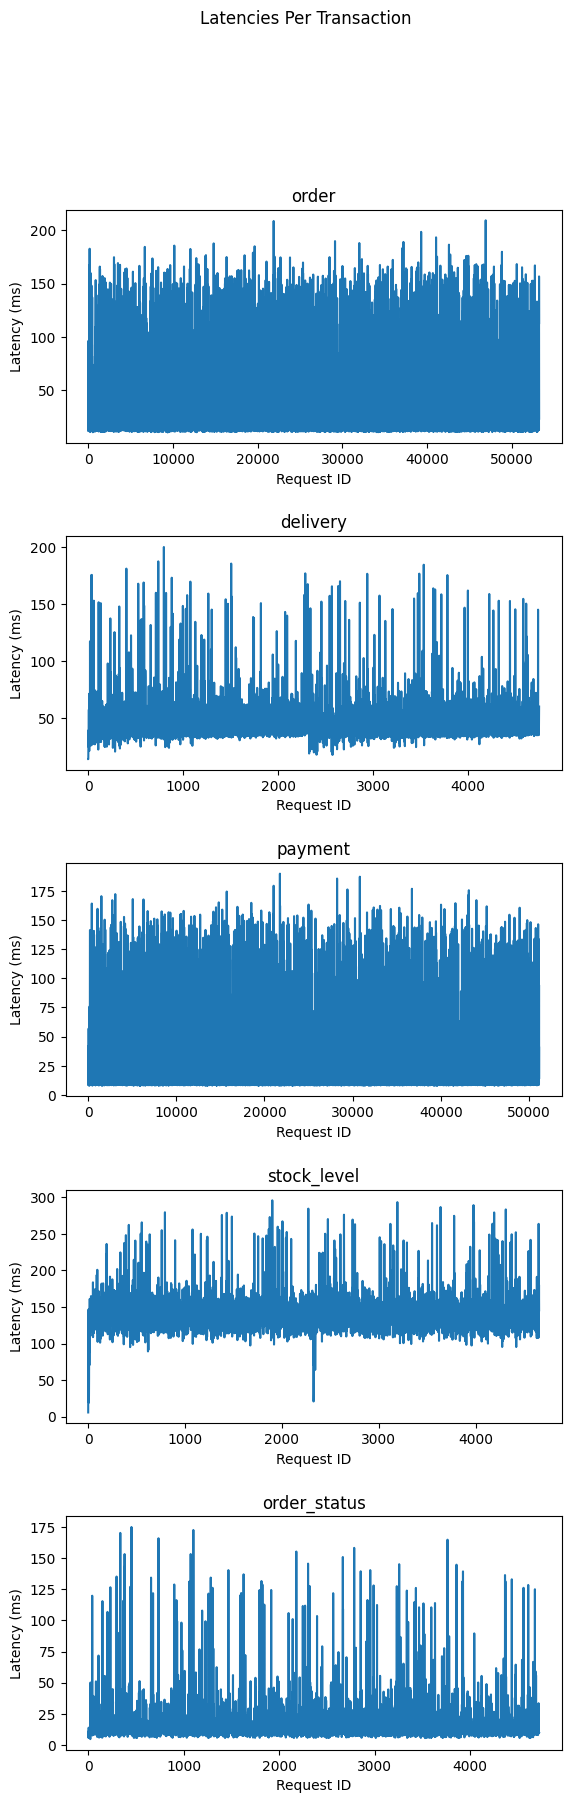

In [22]:
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('Latencies Per Transaction')
for i, key in enumerate(data):
    axes[i].plot(data[key])
    axes[i].set_title(key)
    axes[i].set_xlabel('Request ID')
    axes[i].set_ylabel('Latency (ms)')
figure.savefig(os.path.join(RESULTS_DIR, 'latency.png'))

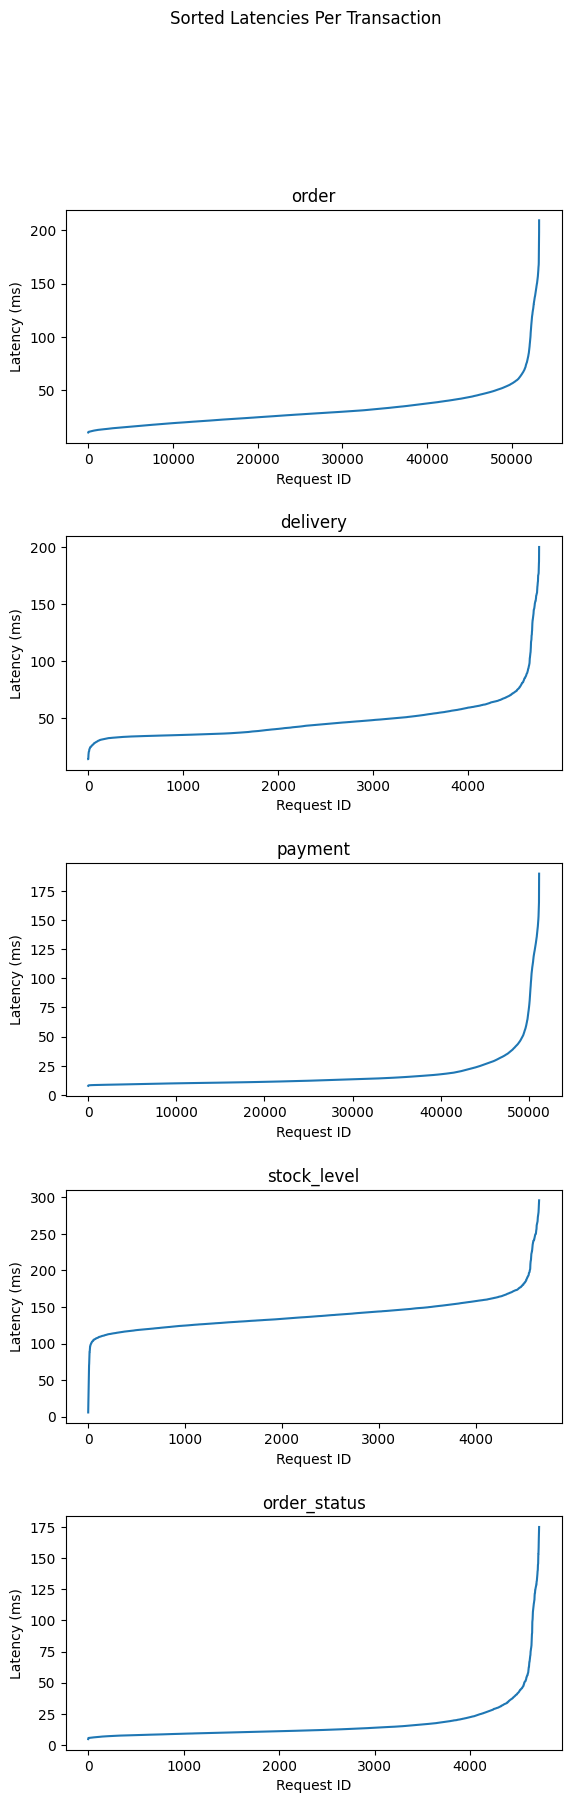

In [24]:
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('Sorted Latencies Per Transaction')
for i, key in enumerate(data):
    axes[i].plot(sorted(data[key]))
    axes[i].set_title(key)
    axes[i].set_xlabel('Request ID')
    axes[i].set_ylabel('Latency (ms)')
figure.savefig(os.path.join(RESULTS_DIR, 'sorted_latency.png'))

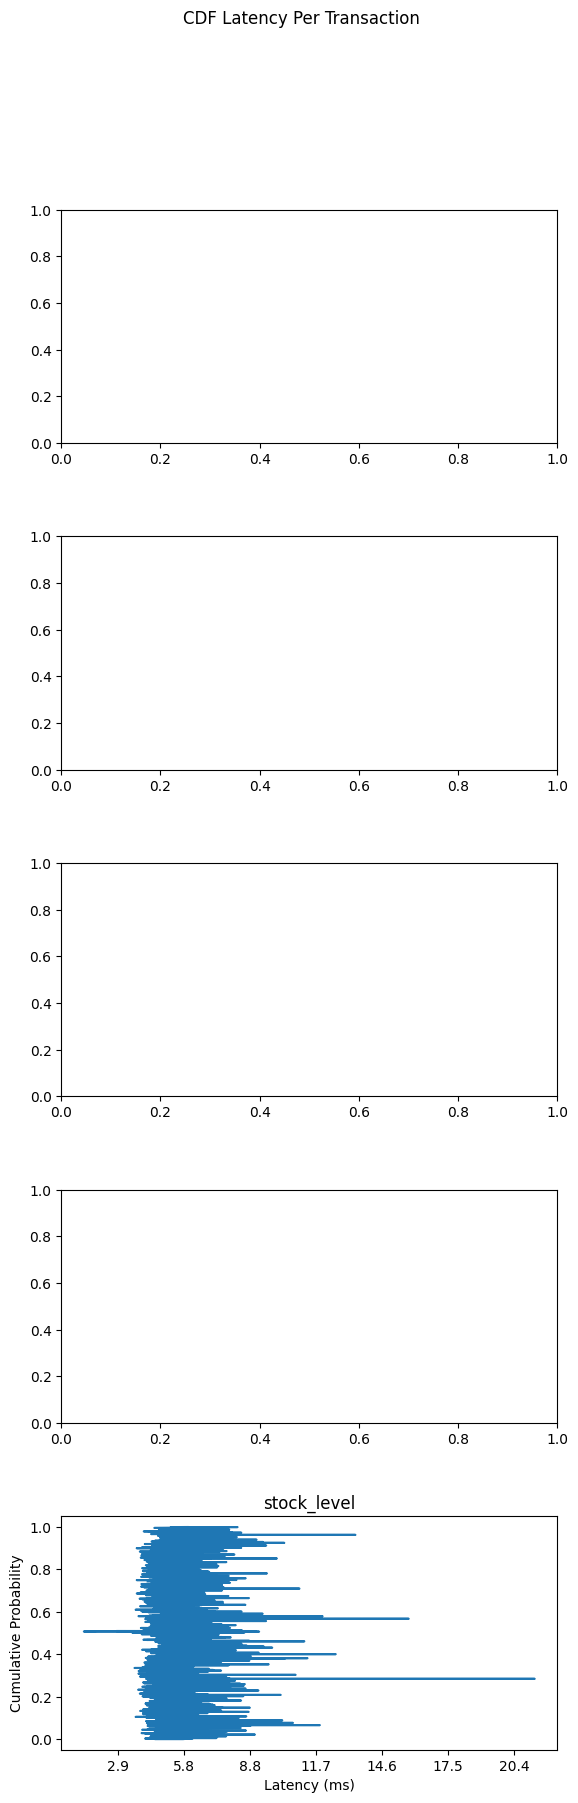

In [7]:
# Cumulative Distribution Function
figure, axes = plt.subplots(nrows=5)
figure.set_figheight(20)
figure.subplots_adjust(hspace=0.4)
figure.suptitle('CDF Latency Per Transaction')
for i, key in enumerate(data):
    cumsum = np.arange(1, len(data[key]) + 1) / len(data[key])
axes[i].plot(data[key], cumsum)
axes[i].set_title(key)
axes[i].set_xlabel('Latency (ms)')
axes[i].set_ylabel('Cumulative Probability')
axes[i].xaxis.set_major_formatter(mtick.PercentFormatter(len(data[key]), symbol=''))
figure.savefig(os.path.join(RESULTS_DIR, 'cdf_latency.png'))

# Metrics

In [23]:
latency_quantiles = [[key,
                      round(data[key].quantile(q=0.5), 4),
                      round(data[key].quantile(q=0.9), 4),
                      round(data[key].quantile(q=0.95), 4),
                      round(data[key].quantile(q=0.99), 4)]
                     for key in data]
df = pd.DataFrame(latency_quantiles, columns=['Transaction', 'P50', 'P90', 'P95', 'P99'])
df.to_csv(os.path.join(RESULTS_DIR, 'latency_quantiles.csv'), index=False)
df

,Transaction,P50,P90,P95,P99
0,order,28.2122,49.4221,59.2948,136.4791
1,delivery,43.5990,64.1097,73.6354,148.4404
2,payment,12.3463,29.2012,42.4885,123.5683
3,stock_level,136.9059,162.2604,173.1581,244.8557
4,order_status,11.7794,28.8990,40.4938,119.9352


In [9]:
data['order'].describe()

count    39626.000000
mean        40.241404
std         25.073054
min         18.295288
25%         29.587567
50%         35.972953
75%         43.707788
max        465.270996
dtype: float64

# All Together

In [9]:
sort_order = ['order', 'payment', 'order_status', 'delivery', 'stock_level']

In [18]:
experiments = os.listdir('results')
for experiment in experiments:
    df = pd.read_csv(f'results/{experiment}/latency_quantiles.csv')
    print(df.sort_values(by='Transaction', key=lambda x: sort_order.index(x[1])))

TypeError: object of type 'int' has no len()

1